In [1]:
import scipy as sp
import numpy as np
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from empiricaldist import Pmf

plt.style.use('seaborn-dark-palette')

In [2]:
a = np.random.normal(0, 1, 1000)
b = np.random.normal(0, 1, 1000) + 2.5

In [3]:
data = pd.DataFrame({'A': a, 'B': b})

In [23]:
data.to_csv('data.csv', index=False)

(array([  2.,  14.,  65., 150., 261., 268., 158.,  62.,  16.,   4.]),
 array([-3.62097486e+00, -2.89691825e+00, -2.17286163e+00, -1.44880501e+00,
        -7.24748397e-01, -6.91780569e-04,  7.23364836e-01,  1.44742145e+00,
         2.17147807e+00,  2.89553468e+00,  3.61959130e+00]),
 <BarContainer object of 10 artists>)

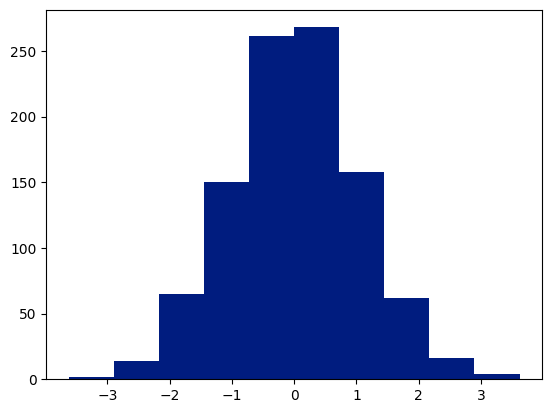

In [4]:
plt.hist(a)

In [ ]:
def extract_data(data, selected_columnnames):
    """Extract columns from the uploaded file by columns selected by the user"""
    return data[selected_columnnames]

### Bayesian A/B

In [5]:
A = data['A']
B = data['B']
A = Pmf(A,np.linspace(-1,4,1000))
B = Pmf(B,np.linspace(-1,4,1000))

In [6]:
exp = sp.stats.expon.rvs(size = 1000)
likelihood = Pmf(exp,np.linspace(-1,4,1000))

<AxesSubplot:ylabel='Density'>

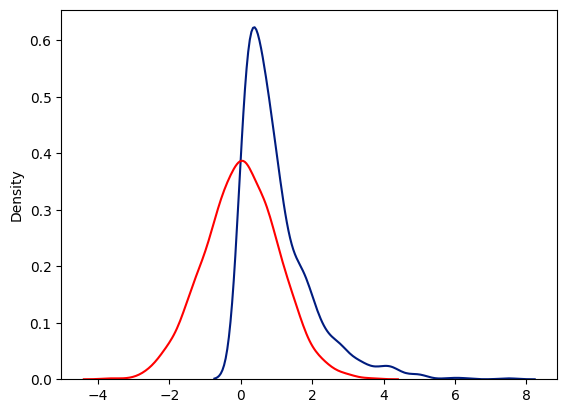

In [7]:
sns.kdeplot(likelihood)
sns.kdeplot(a,color = 'r')

<AxesSubplot:ylabel='Density'>

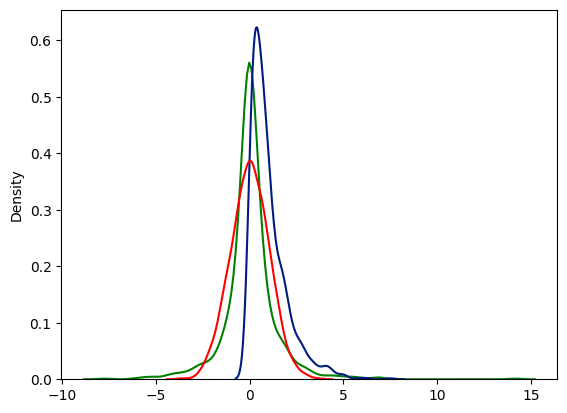

In [8]:
posterior = a * likelihood
sns.kdeplot(posterior, color = 'g')
sns.kdeplot(likelihood)
sns.kdeplot(a,color = 'r')

In [9]:
A_posterior = A * likelihood
B_posterior = B * likelihood

A_posterior.normalize()
A_posterior.normalize()

1.0

(array([999.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.23989561, 0.47979122, 0.71968683, 0.95958244,
        1.19947804, 1.43937365, 1.67926926, 1.91916487, 2.15906048,
        2.39895609]),
 <BarContainer object of 10 artists>)

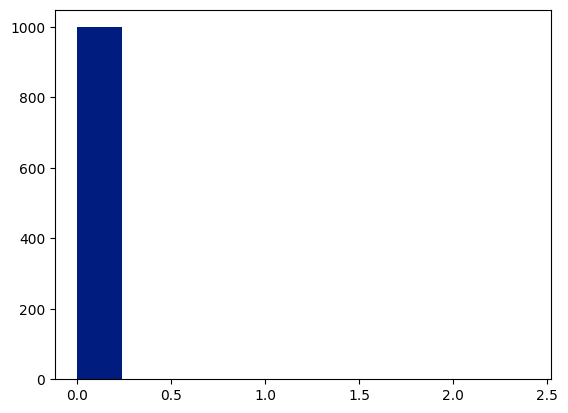

In [10]:
plt.hist(B_posterior)

<AxesSubplot:>

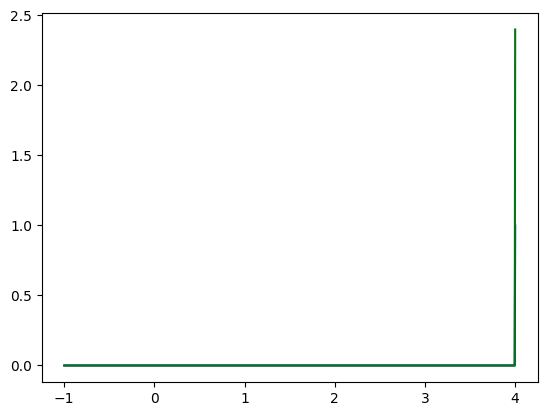

In [11]:
A_posterior.plot(label='A')
B_posterior.plot(label='B')

In [12]:
def bayes_AB(data , prior):
    A = data['A']
    B = data['B']
    A = Pmf(A,np.linspace(-1,1,1000))
    B = Pmf(B,np.linspace(-1,1,1000))
    
    likelihood =  A / B
    posterior = prior * likelihood
    return posterior

### Frequentist A/B

In [13]:
def ttest(data,ispaired = False ,istwosided = False ): 
    return pg.ttest(data['A'], data['B'], paired=ispaired, tail='one-sided' if istwosided else 'two-sided')

In [14]:
def plot_distri(data):
    sns.distplot(data['A'], label='A')
    sns.distplot(data['B'], label='B')
    plt.xlabel('value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

c:\Users\ja\anaconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ja\anaconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


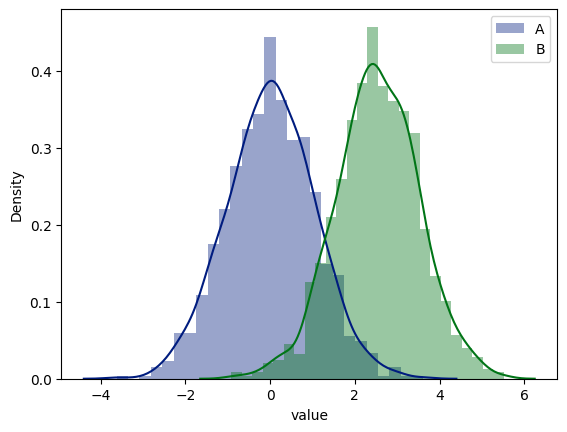

In [15]:
plot_distri(data)

In [21]:
round(ttest(data),5)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-56.35105,999,two-sided,0.0,"[-2.61, -2.43]",2.50701,1.596e+308,1.0


In [ ]:
def anova(data):
    return pg.anova(data = data, dv='value', between='group')